In [3]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras import backend as K 
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from tensorflow.keras.models import load_model
import os
import datetime
from tensorflow.python.tools import freeze_graph
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# K.clear_session()
# K.set_learning_phase(0)

In [5]:
model = load_model('22julyrev2.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 60, 60, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 66, 66, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 30, 30, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 30, 30, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [8]:
PATH = "Defects/"
sz=60
#batch_size=16

In [9]:
test_data_dir = f'{PATH}test'

In [65]:
test_datagen = ImageDataGenerator()

In [66]:
test_generator = test_datagen.flow_from_directory(test_data_dir,
    target_size=(sz, sz),
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42)

Found 1491 images belonging to 2 classes.


In [67]:
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size
test_generator.reset()
#make prediction
pred = model.predict_generator(test_generator, steps=STEP_SIZE_TEST, verbose=1)

1491/1491 [==============================] - 50s 33ms/step


In [68]:
y_pred_ind= np.argmax(pred, axis=1)
y_class= test_generator.classes

In [69]:
cm = sklearn.metrics.confusion_matrix(y_class, y_pred_ind)

[[Text(0, 0.5, 'Bubble'), Text(0, 1.5, 'Particle')]]

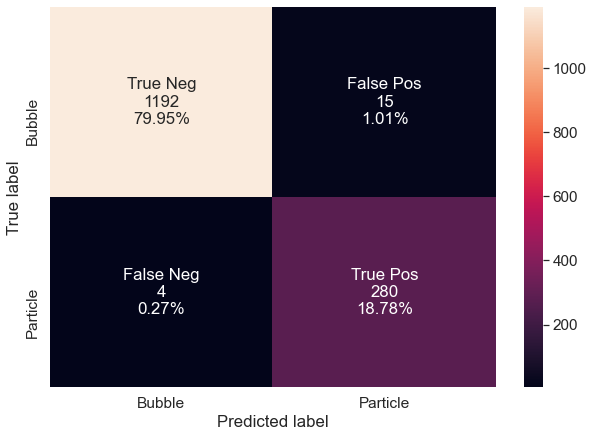

In [70]:
#plot confusion matrix
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
group_names  = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names ,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
g = sns.heatmap(cm, annot=labels, fmt="")
plt.ylabel('True label')
plt.xlabel('Predicted label')

#to be improved#####
g.set(xticklabels=['Bubble','Particle'])
g.set(yticklabels=['Bubble','Particle'])

In [71]:
predicted_class_indices=np.argmax(pred,axis=1)

In [72]:
predicted_class_indices

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [73]:
test_generator.class_indices = {'Bubble': 0, 'Particle': 1}

In [74]:
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [75]:
labels_class = (test_generator.class_indices)
labels_class = dict((v,k) for k,v in labels.items())
classification = [labels[k] for k in test_generator.classes]

In [76]:
import pandas as pd

In [78]:
filenames=test_generator.filenames
df_analysis=pd.DataFrame({"Filename":filenames,
                      "Predictions":y_pred_ind,
                      "Classification":y_class,
                      "Bubble":pred[:,0],
                      "Particle":pred[:,1]
                     })
df_analysis.to_csv("resultstranferlearning.csv",index=False)